In [ ]:
##############################################################################
###                       Pronosticos y series de tiempo                    ##
###                      UANL FIME Logistica                                ##
###                     25/06/2022                                          ##
###                                                   xoce15@ingenieros.com ##
##############################################################################

#Librerias

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from google.colab import drive
from google.colab import files
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error

# Funciones

### Calculo de error

In [ ]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [ ]:
def errores( reales, prediccion):
  s=[]
  s.append(['r2_score' ,r2_score(reales, prediccion)])
  s.append(['mean_absolute_error' ,mean_absolute_error(reales, prediccion)])
  s.append(['mean_squared_error' ,mean_squared_error(reales, prediccion)])
  s.append(['mean_absolute_percentage_error' ,mean_absolute_percentage_error(reales, prediccion)])
  s.append(['max_error' ,max_error(reales, prediccion)])
  s=pd.DataFrame(s)
  s.columns=['metrica', 'valor']
  return s

#Conexion Drive

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Path de conexiones, accesos a datos

In [ ]:
path='/content/drive/MyDrive/Planeacion_Demanda_Pronosticos/Datos_Clase'

path_imagenes='/content/drive/MyDrive/Planeacion_Demanda_Pronosticos/Imagenes/Daniel'

# Variables

In [ ]:
today = date.today()
today= today.strftime("%d-%b-%Y")

# Lectura de datos

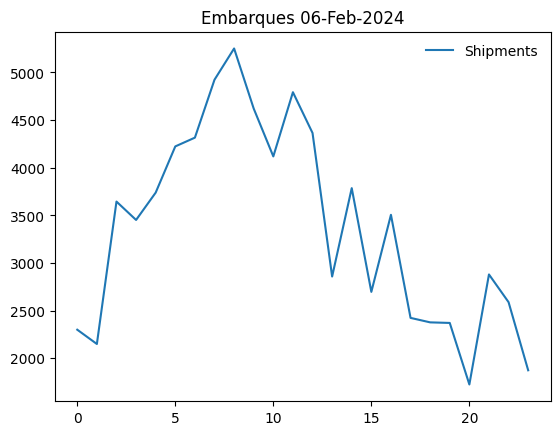

In [ ]:
airline = pd.read_csv(path+"/" +'Shipment.csv', parse_dates=True)
airline['Month']=pd.to_datetime(airline['Month'], errors='coerce') #.dt.strftime('%Y-%m')

airline.dropna(axis=0, inplace=True)
airline[['Shipments']].plot(title='Embarques '+today)
plt.legend(framealpha=1, frameon=False);

# Descomposición de la Serie de tiempo

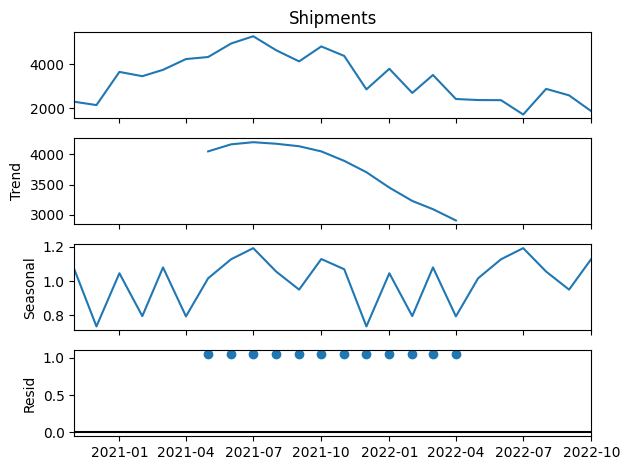

In [ ]:
airline = airline.set_index('Month')
airline.index.freq = "MS"

decompose_result = seasonal_decompose(airline["Shipments"],model="multiplicative")
decompose_result.plot();

# Verificación de alphas

alpha: 0.259
alpha: 0.685
alpha: 0.684
alpha: 0.849
alpha: 0.186
alpha: 0.231
alpha: 0.147
alpha: 0.225
alpha: 0.734
alpha: 0.13
alpha: 0.531
alpha: 0.214
alpha: 0.295
alpha: 0.432
alpha: 0.838
alpha: 0.608
alpha: 0.014
alpha: 0.276
alpha: 0.147
alpha: 0.871
alpha: 0.81
alpha: 0.806
alpha: 0.826
alpha: 0.745
alpha: 0.949
alpha: 0.794
alpha: 0.257
alpha: 0.85
alpha: 0.487
alpha: 0.755
alpha: 0.564
alpha: 0.43
alpha: 0.364
alpha: 0.43
alpha: 0.314
alpha: 0.117
alpha: 0.82
alpha: 0.798
alpha: 0.986
alpha: 0.691
alpha: 0.554
alpha: 0.748
alpha: 0.135
alpha: 0.677
alpha: 0.443
alpha: 0.177
alpha: 0.203
alpha: 0.523
alpha: 0.253
alpha: 0.459
alpha: 0.605
alpha: 0.396
alpha: 0.131
alpha: 0.491
alpha: 0.235
alpha: 0.236
alpha: 0.194
alpha: 0.366
alpha: 0.073
alpha: 0.651
alpha: 0.954
alpha: 0.39
alpha: 0.719
alpha: 0.933
alpha: 0.043
alpha: 0.142
alpha: 0.806
alpha: 0.838
alpha: 0.639
alpha: 0.16
alpha: 0.413
alpha: 0.868
alpha: 0.886
alpha: 0.803
alpha: 0.203
alpha: 0.854
alpha: 0.375
alpha: 

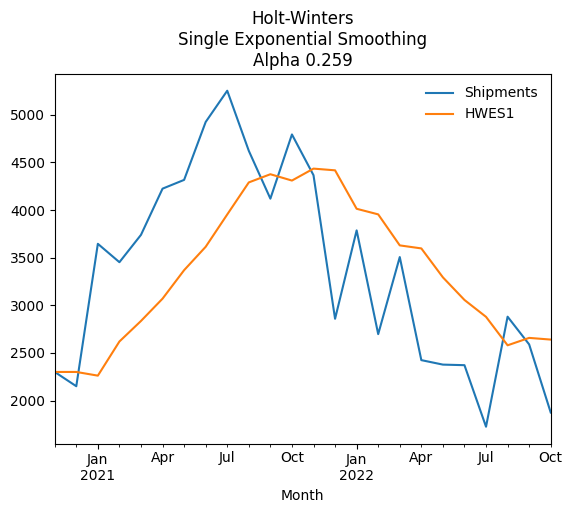

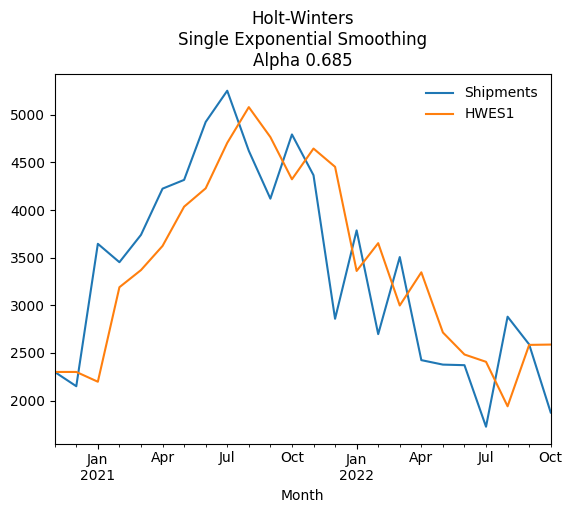

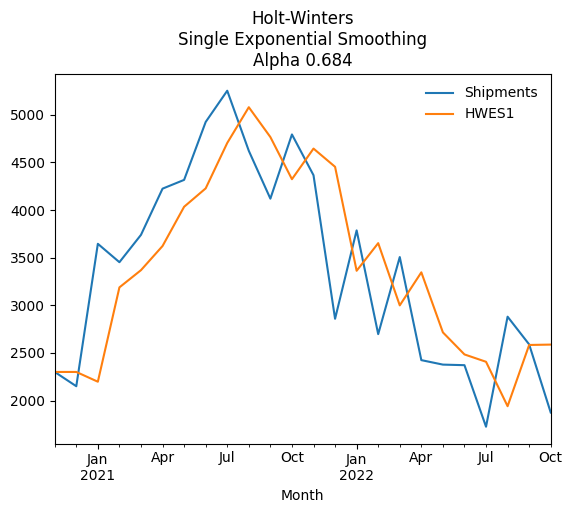

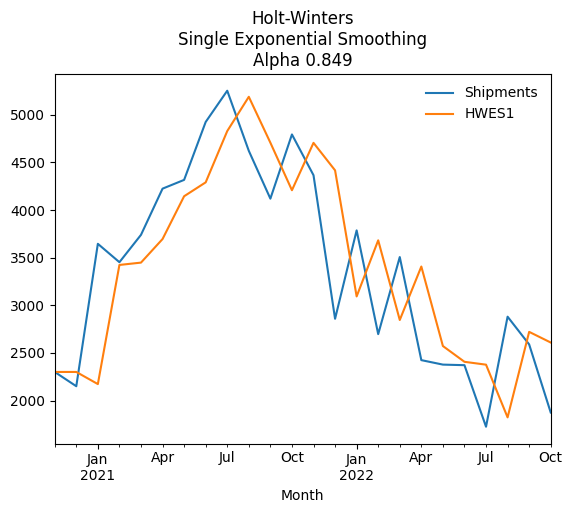

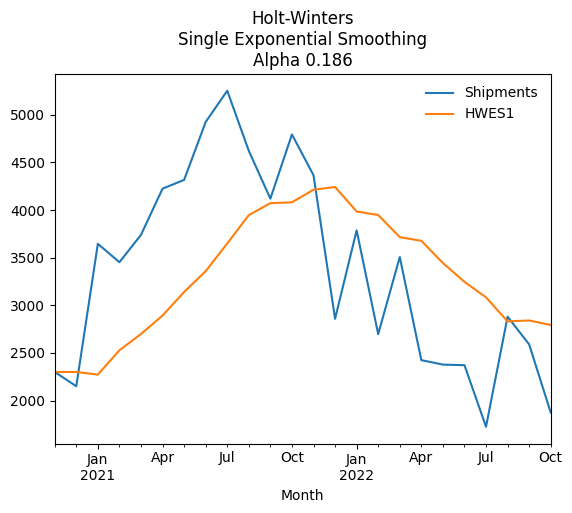

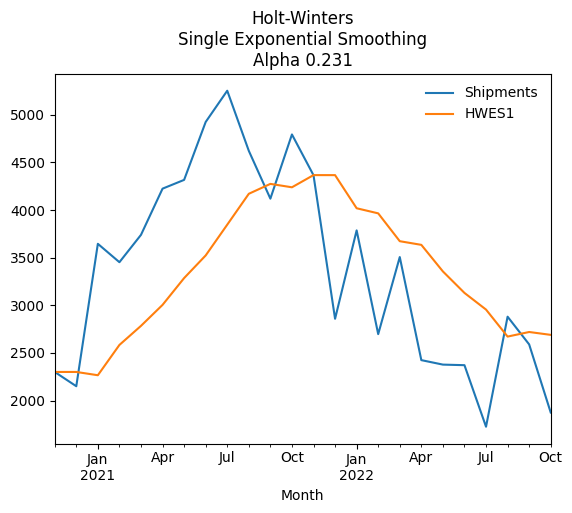

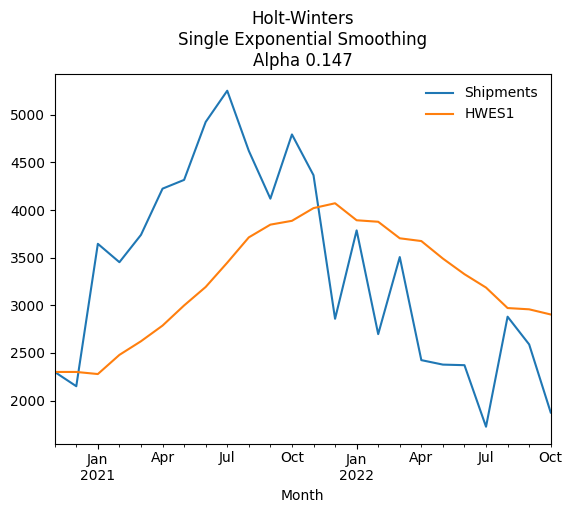

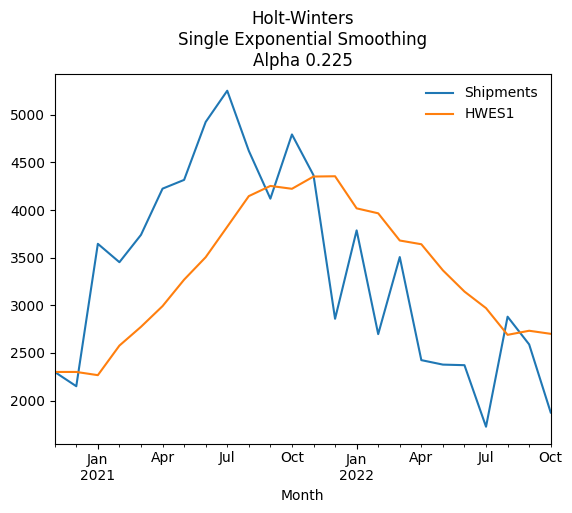

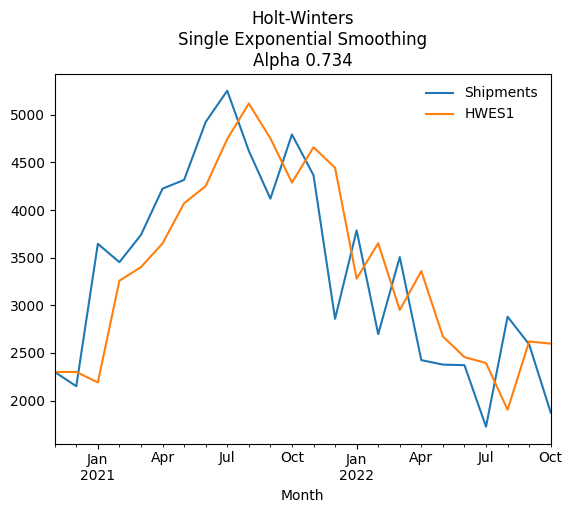

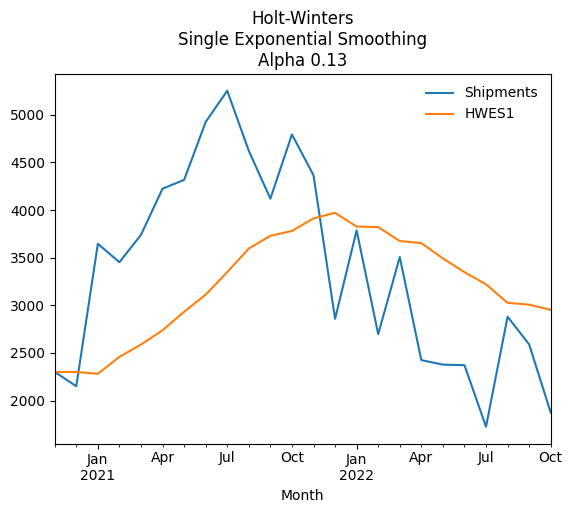

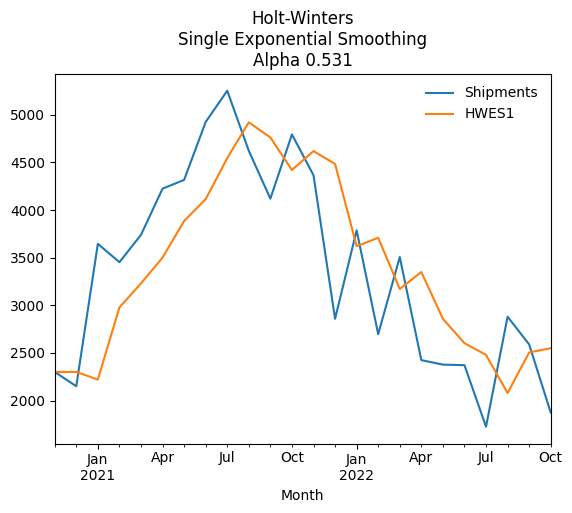

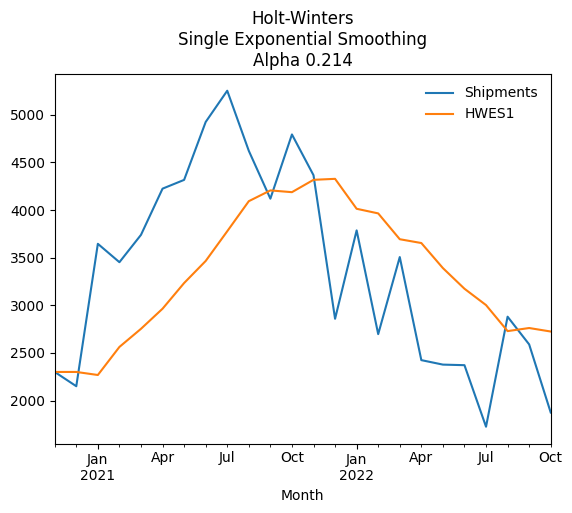

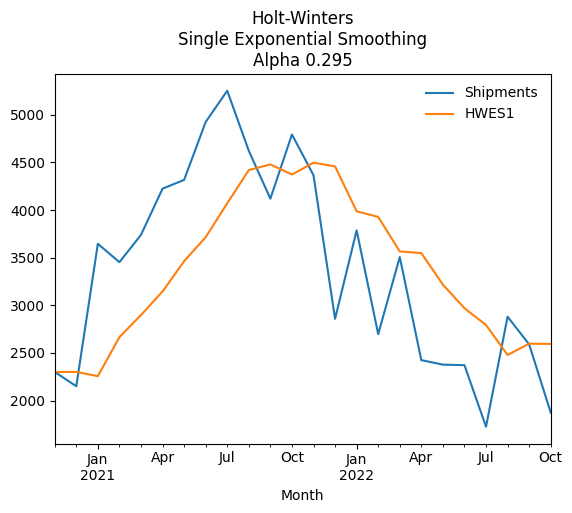

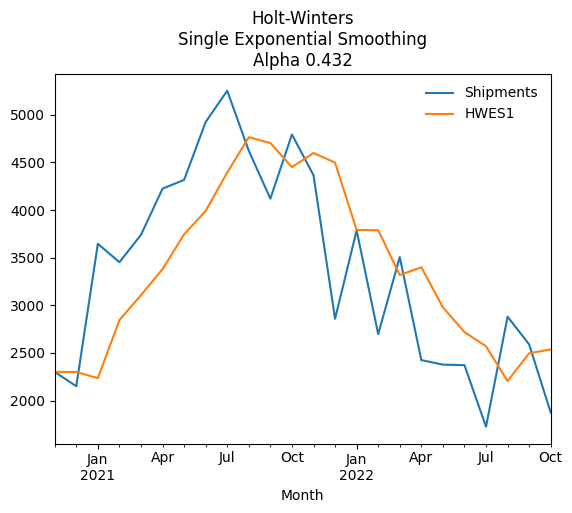

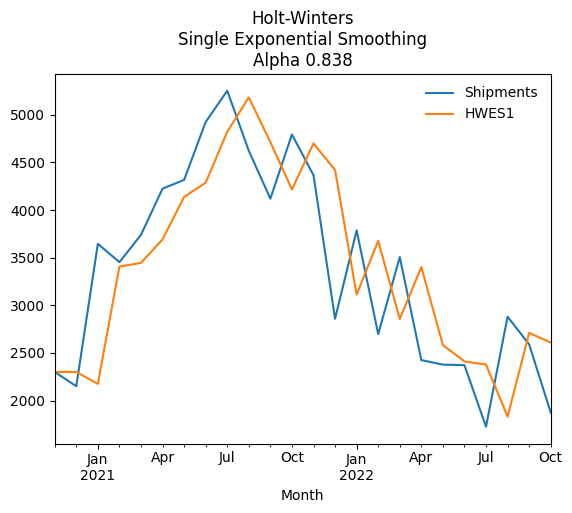

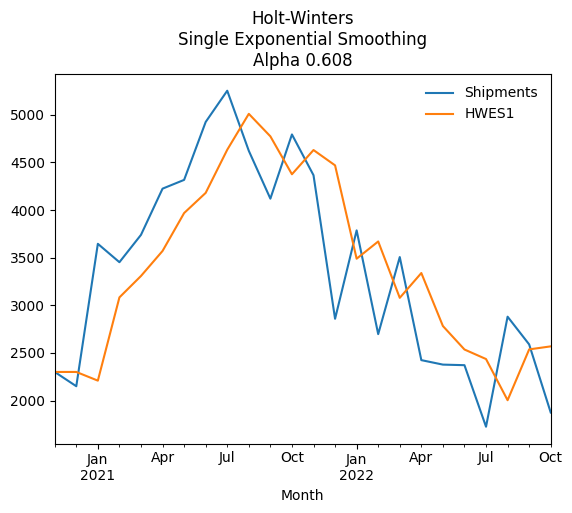

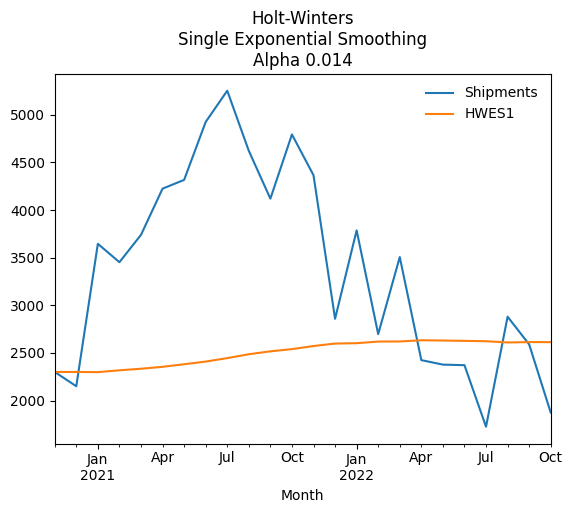

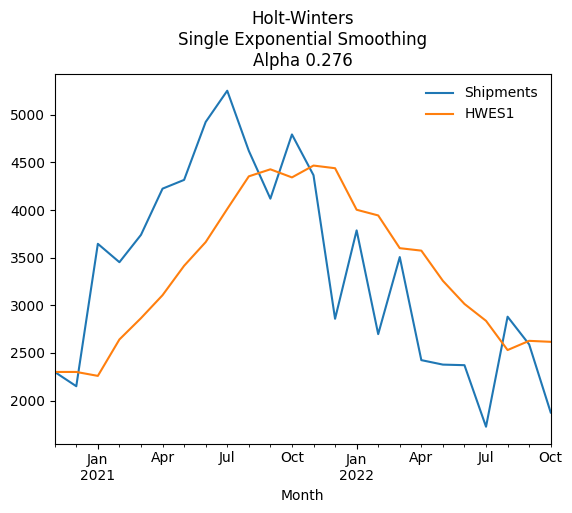

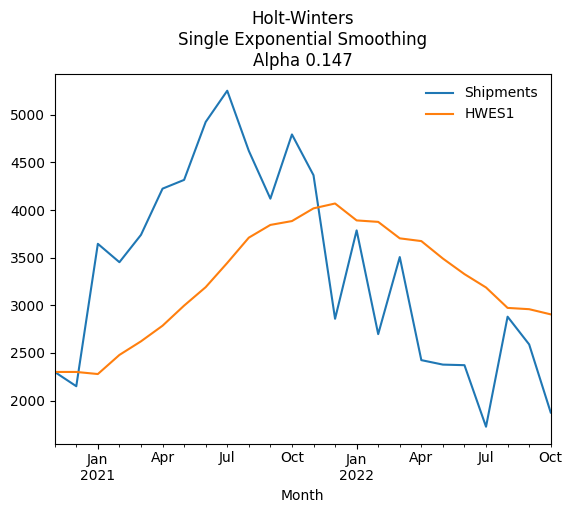

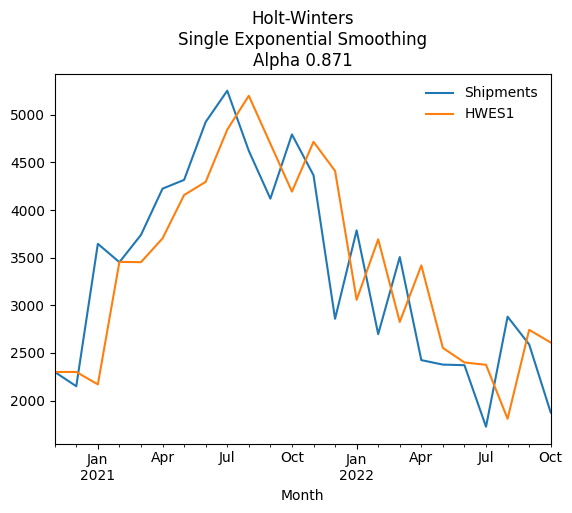

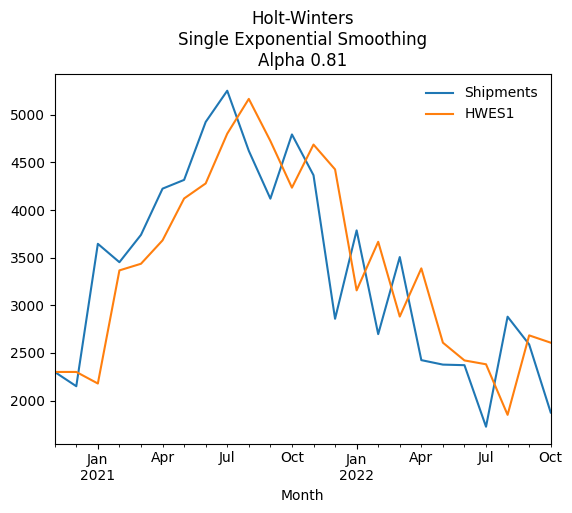

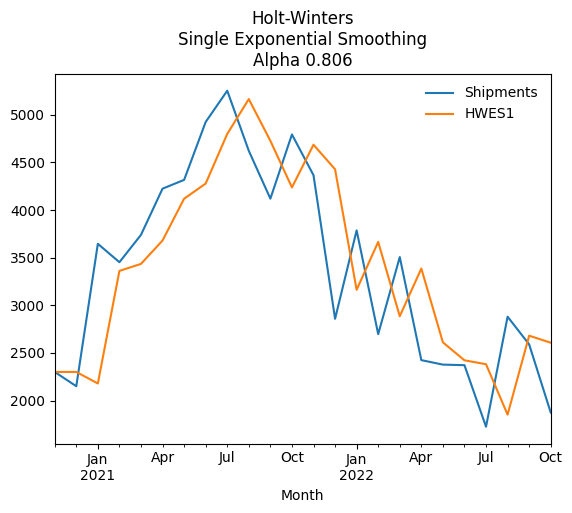

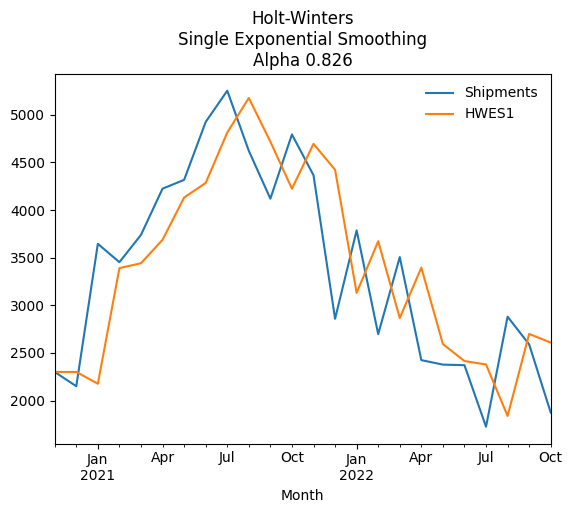

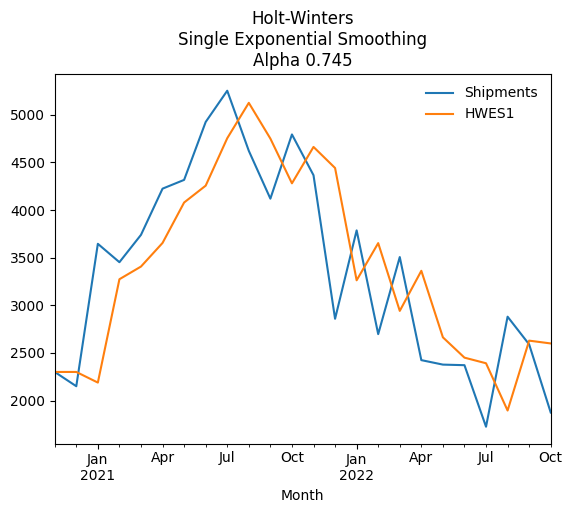

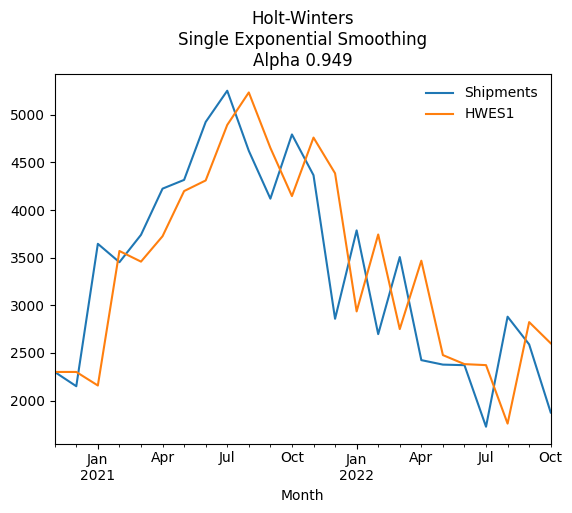

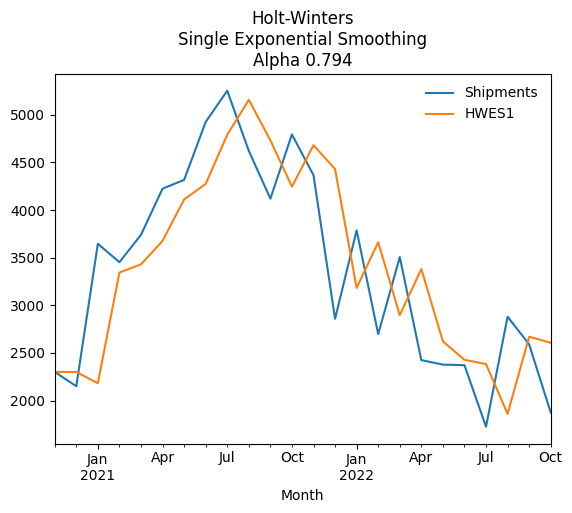

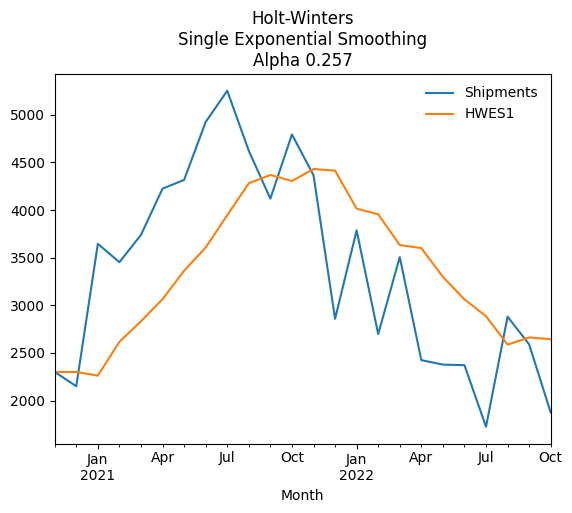

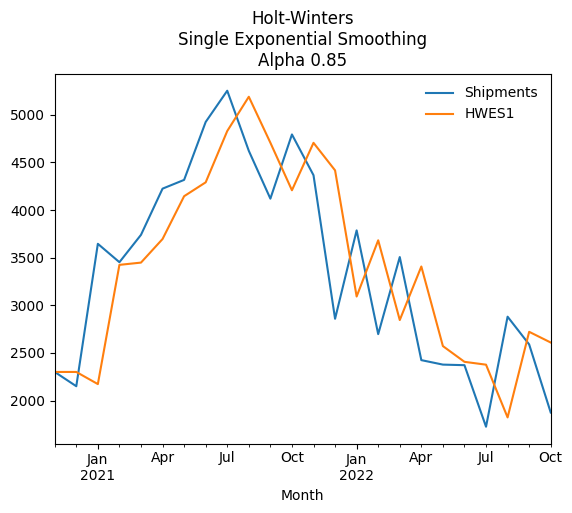

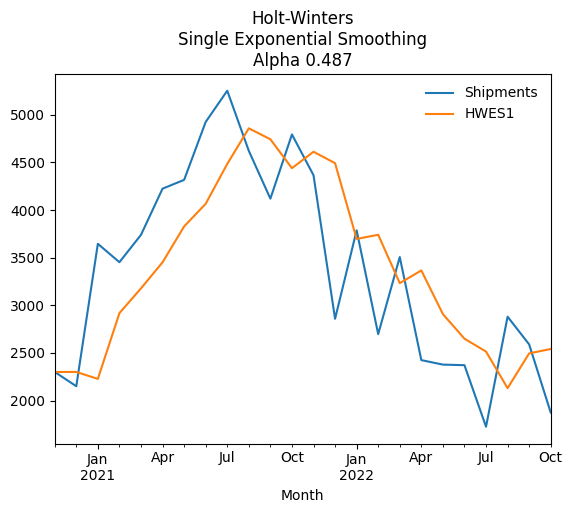

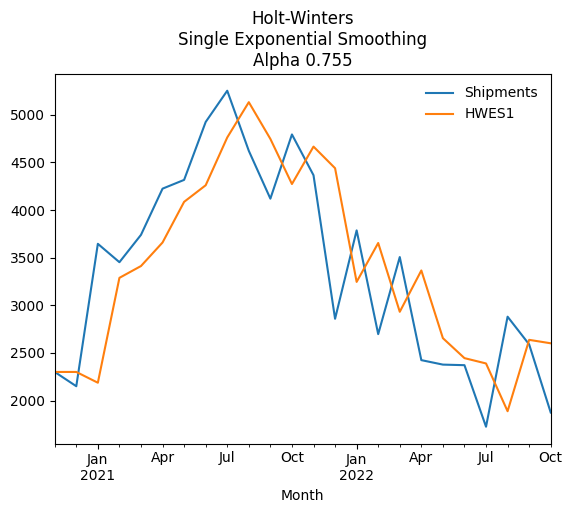

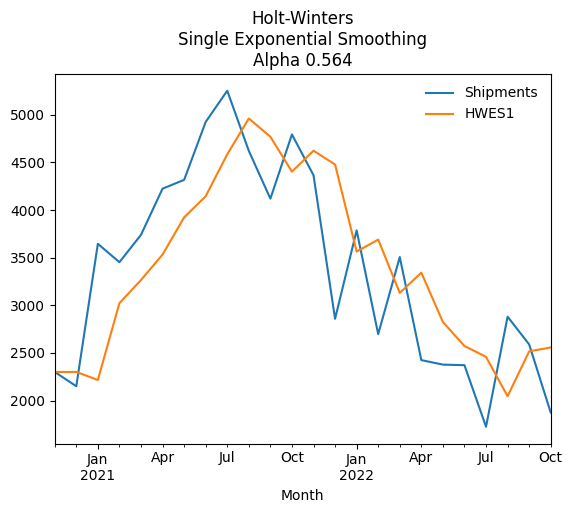

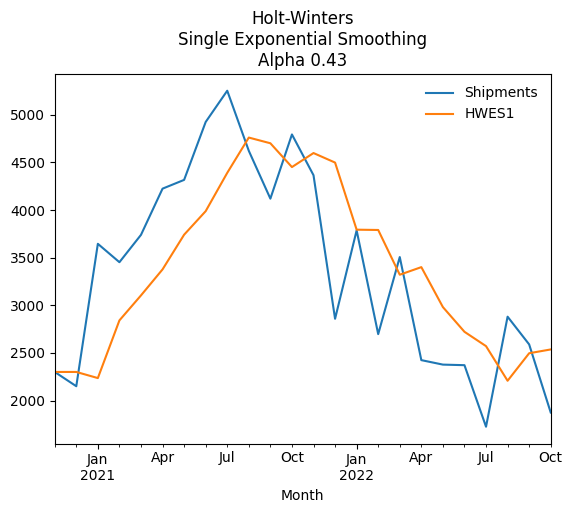

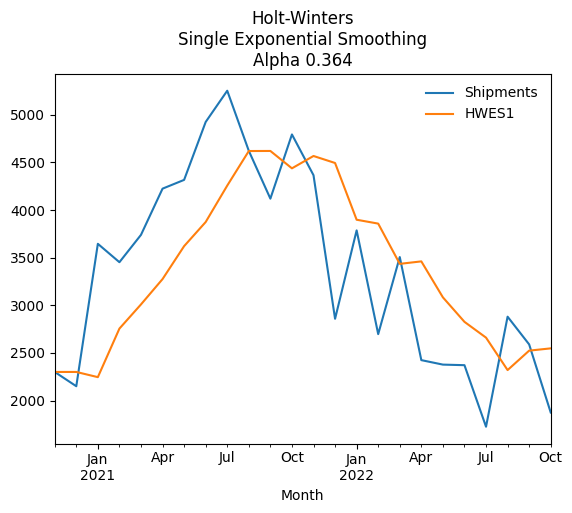

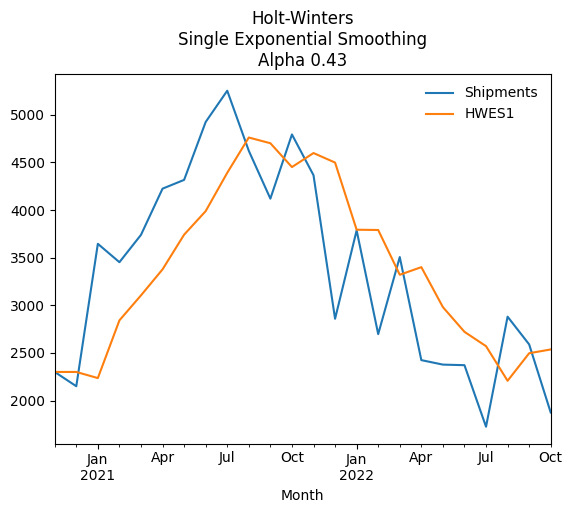

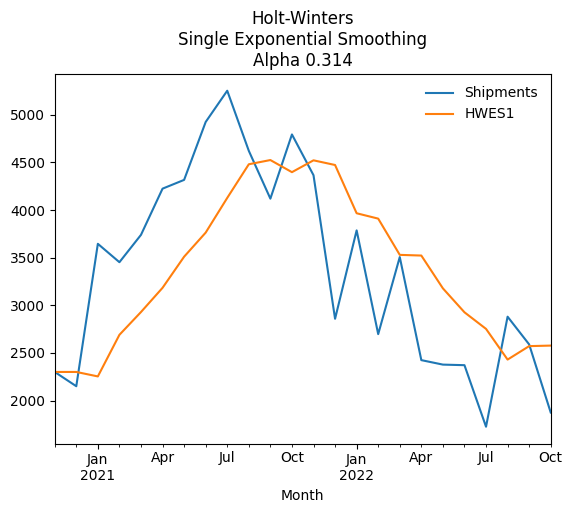

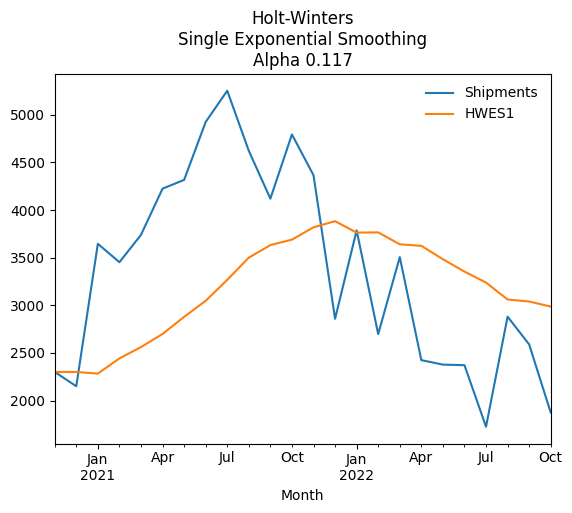

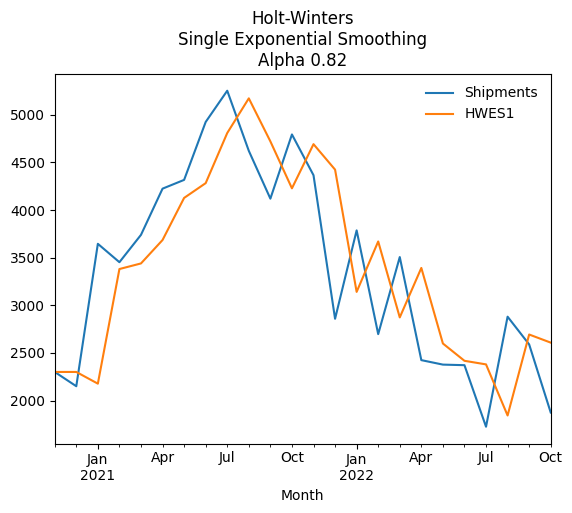

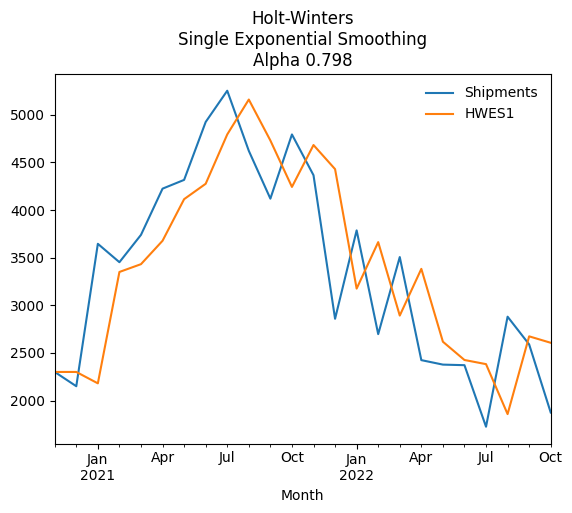

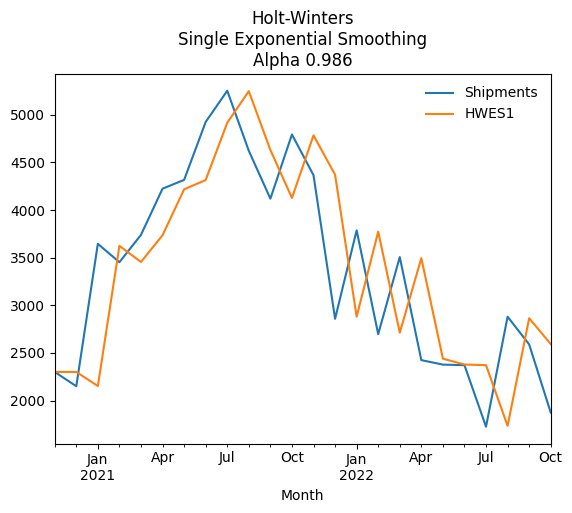

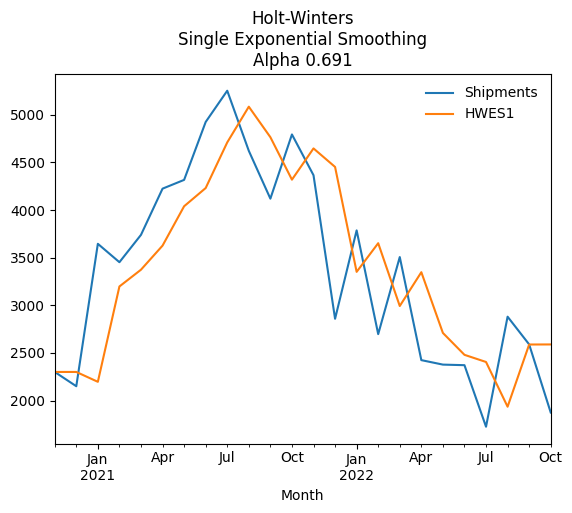

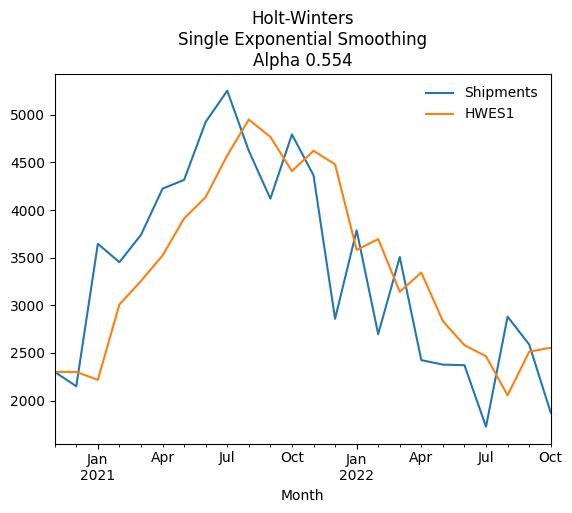

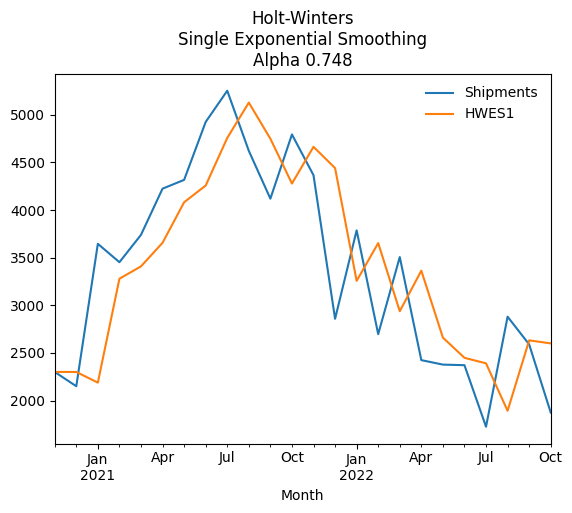

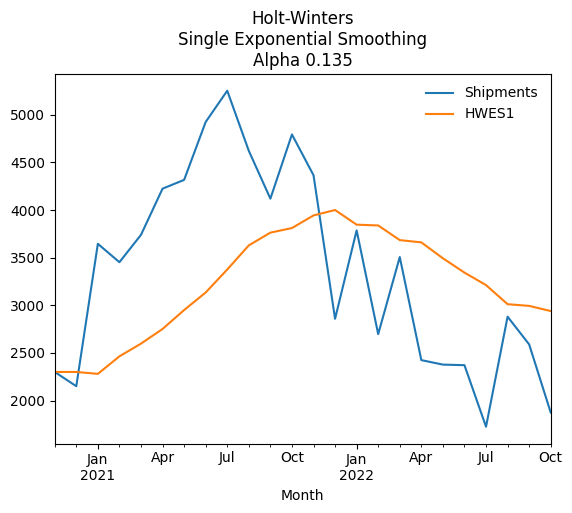

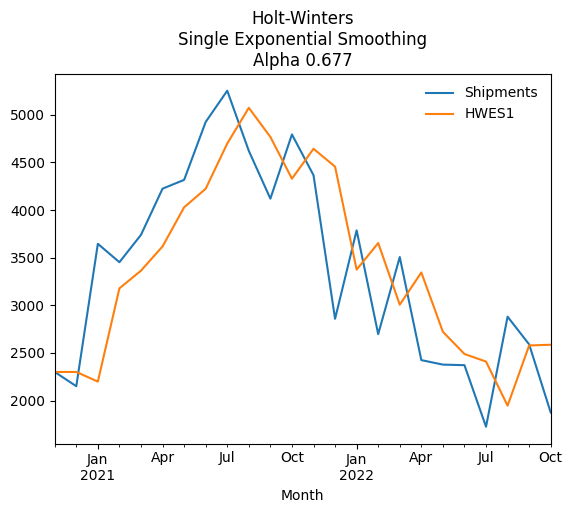

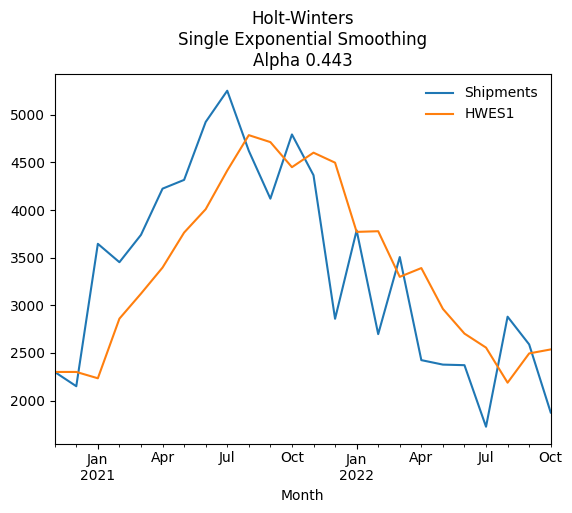

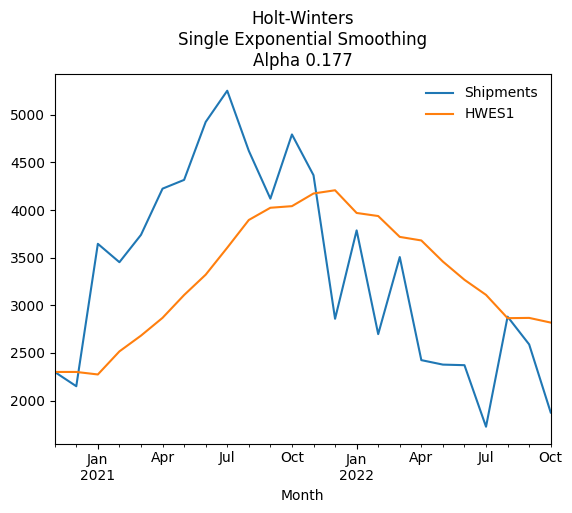

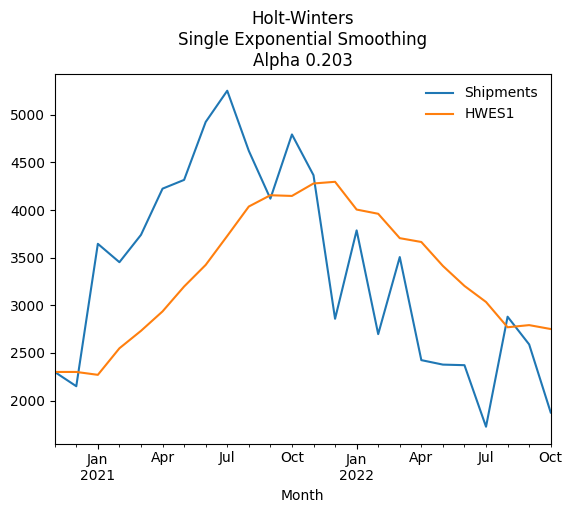

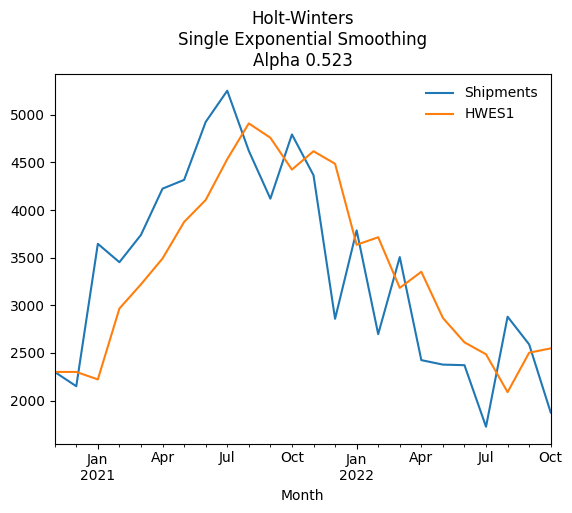

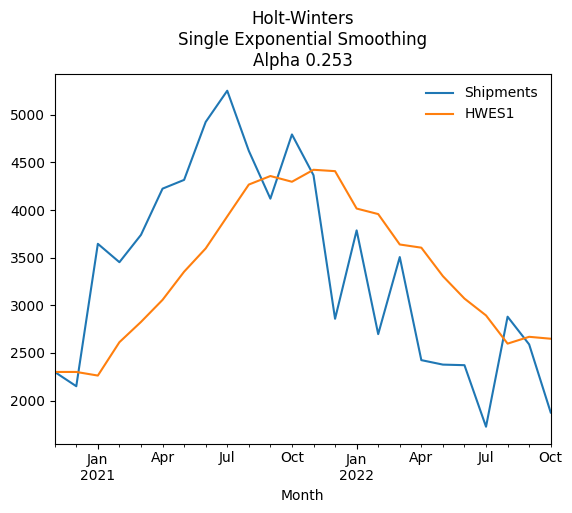

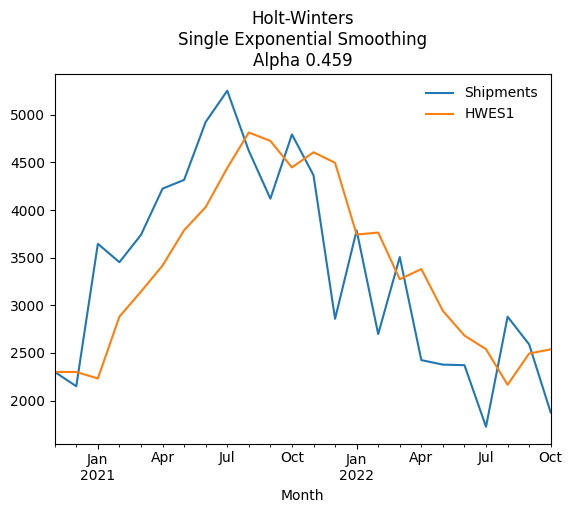

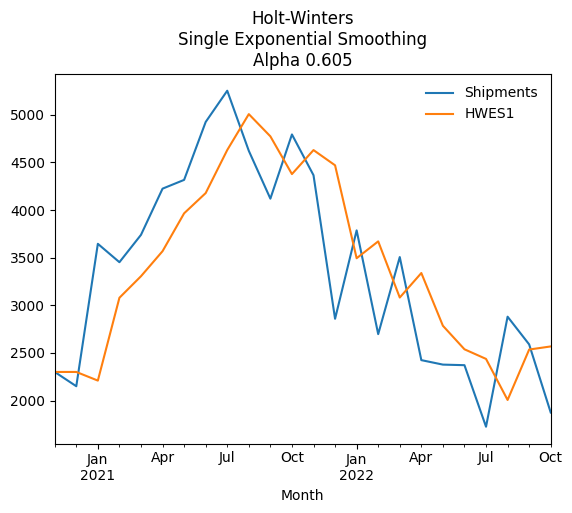

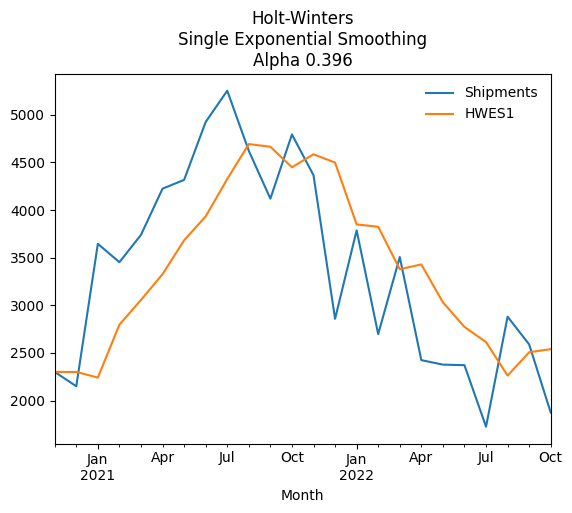

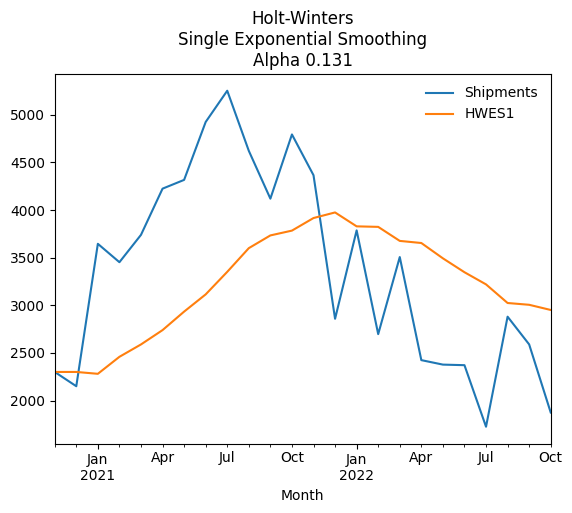

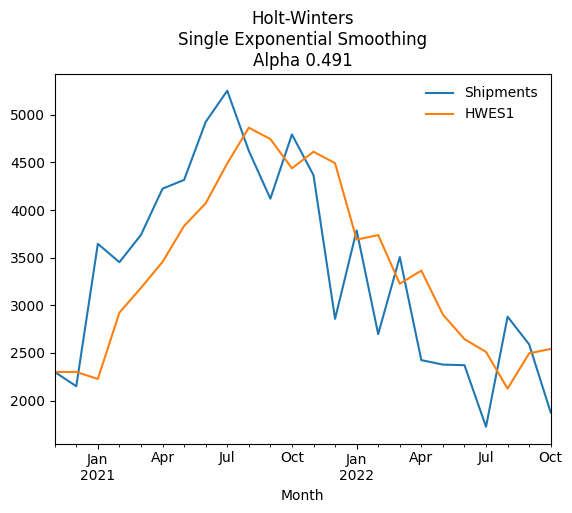

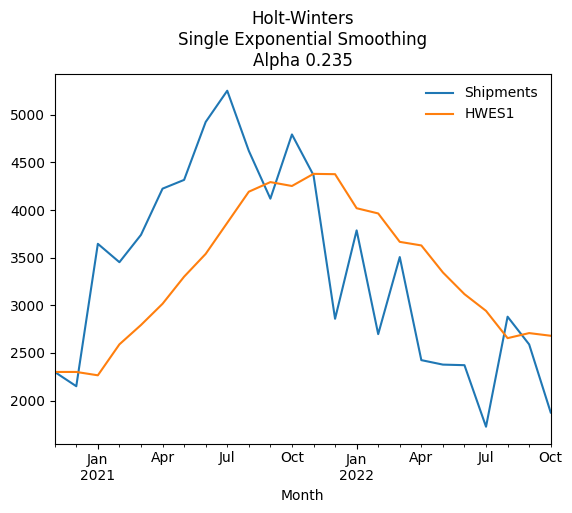

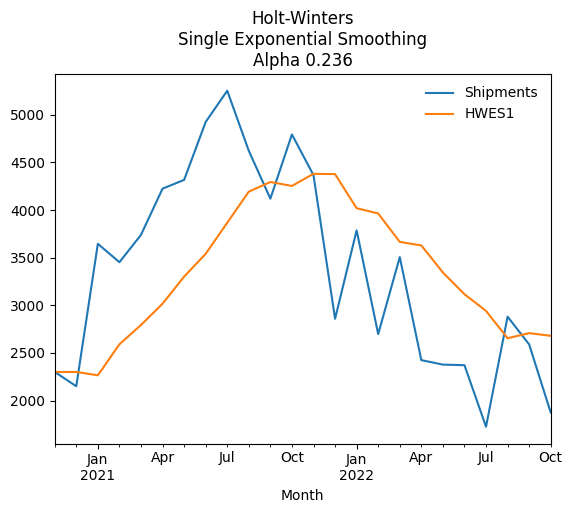

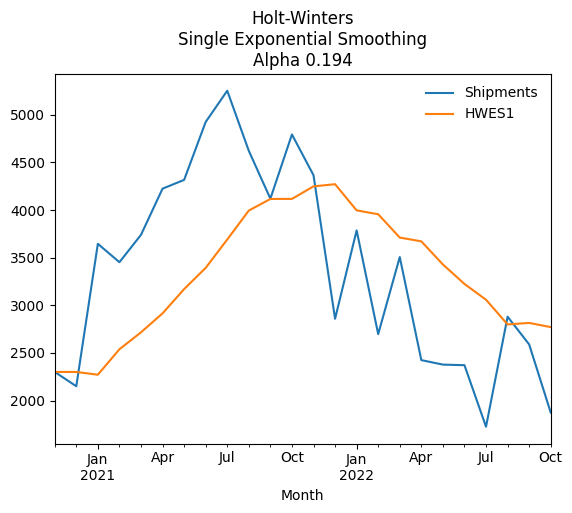

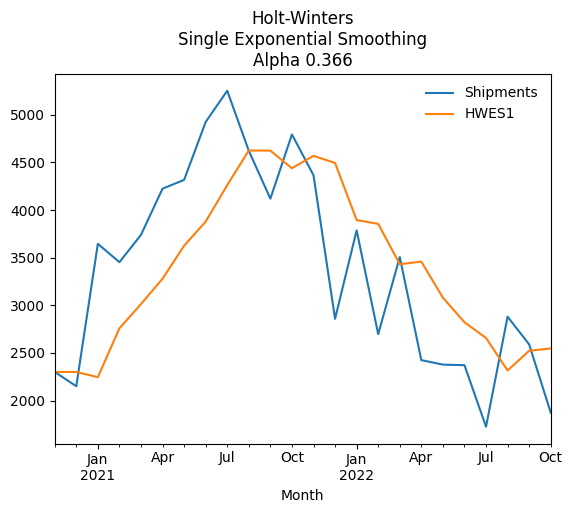

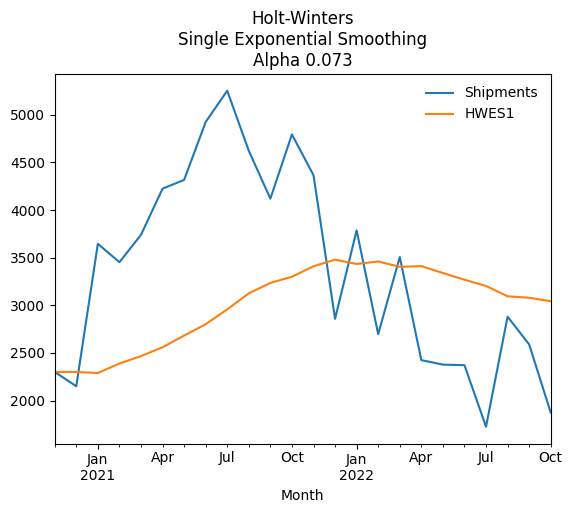

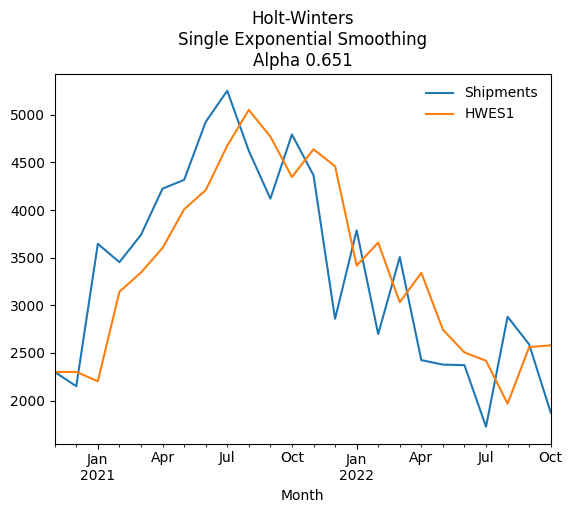

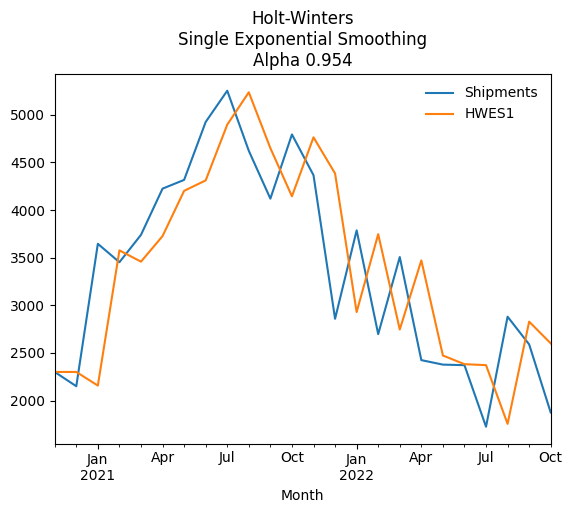

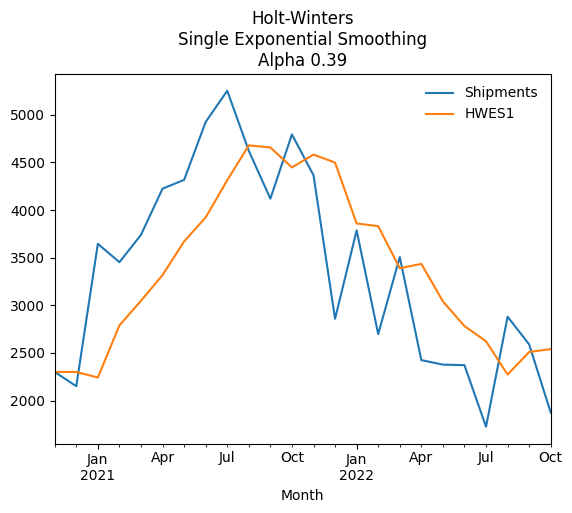

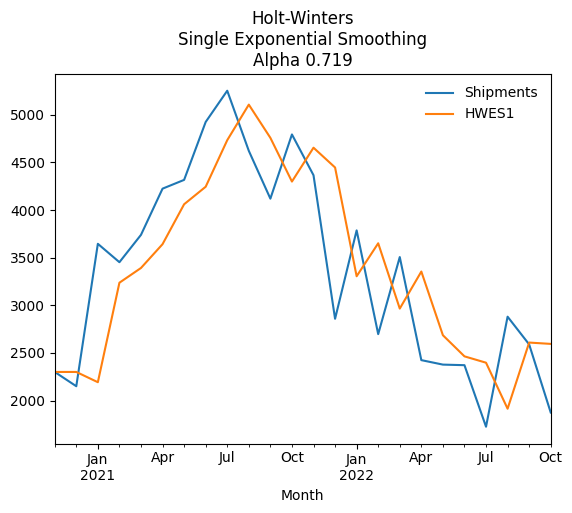

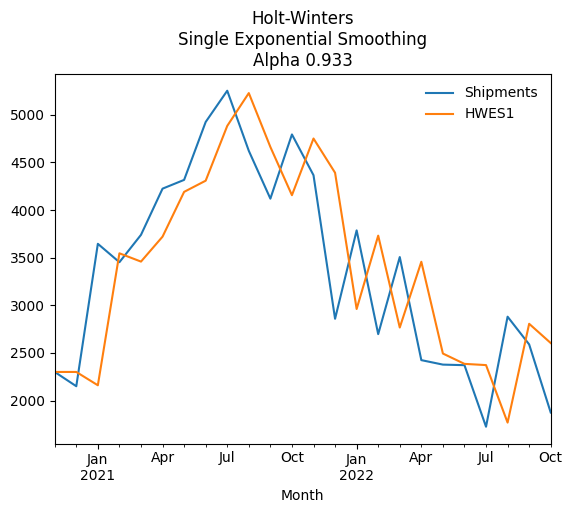

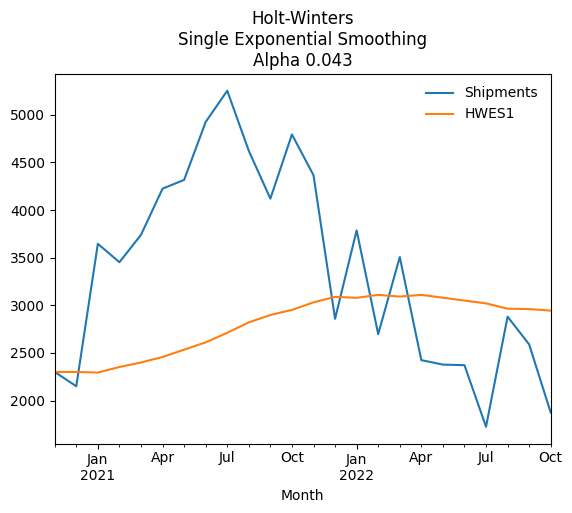

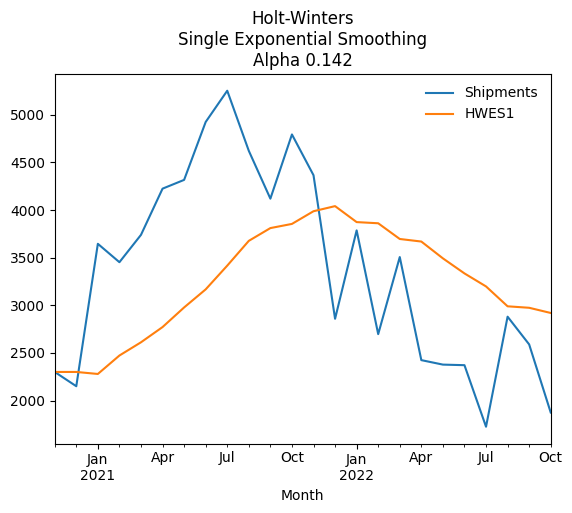

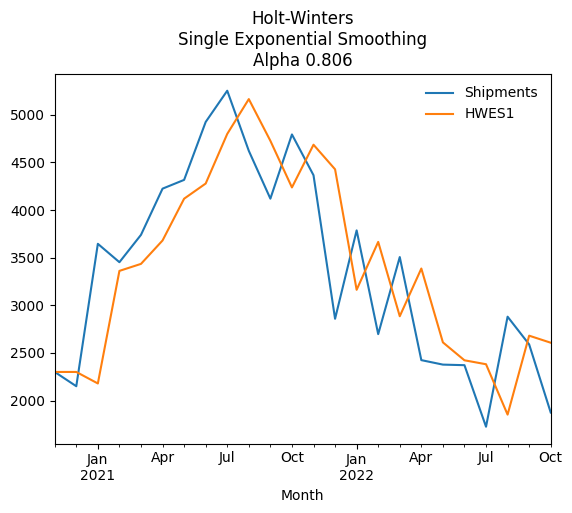

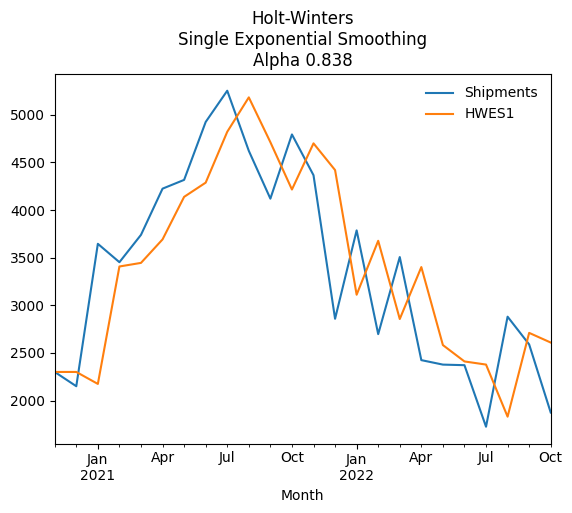

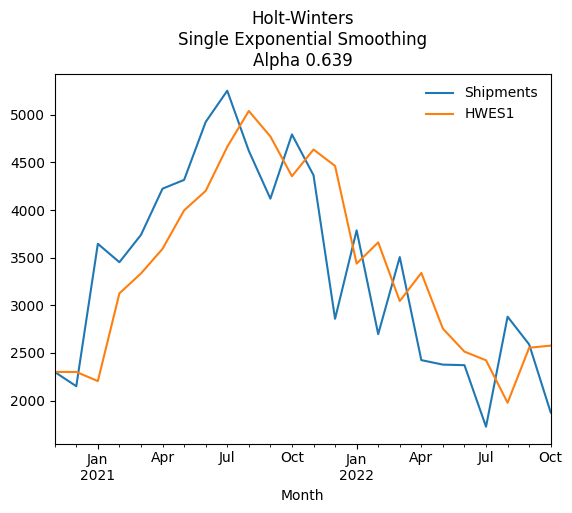

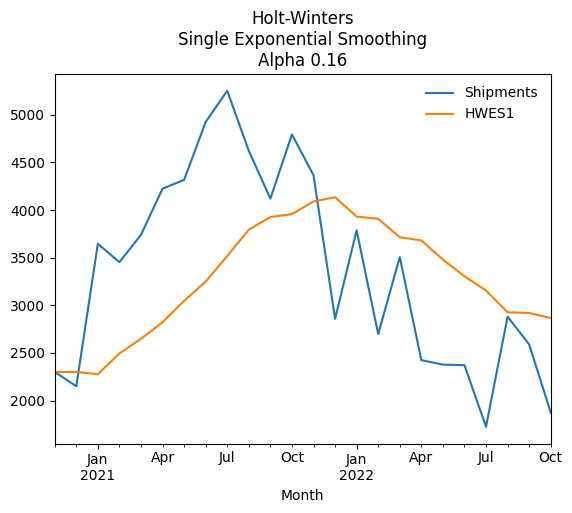

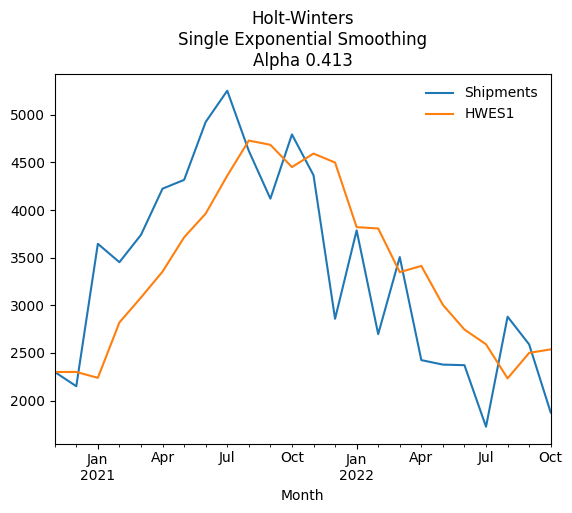

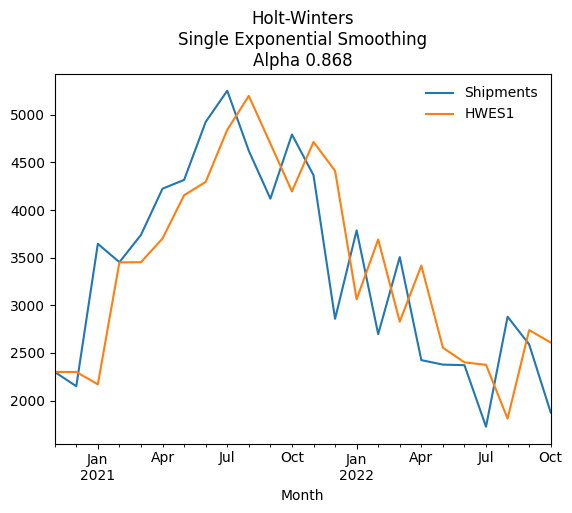

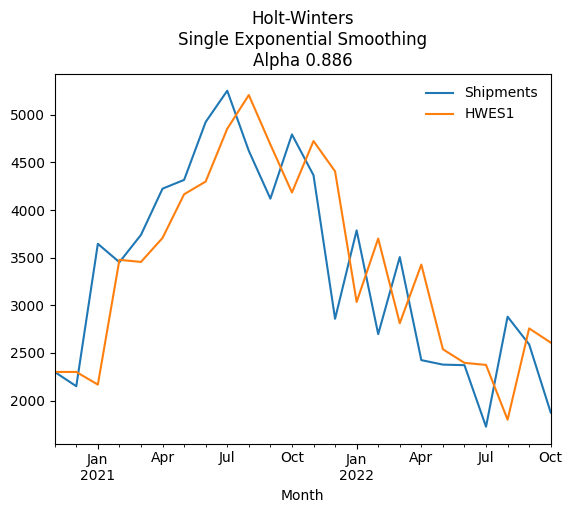

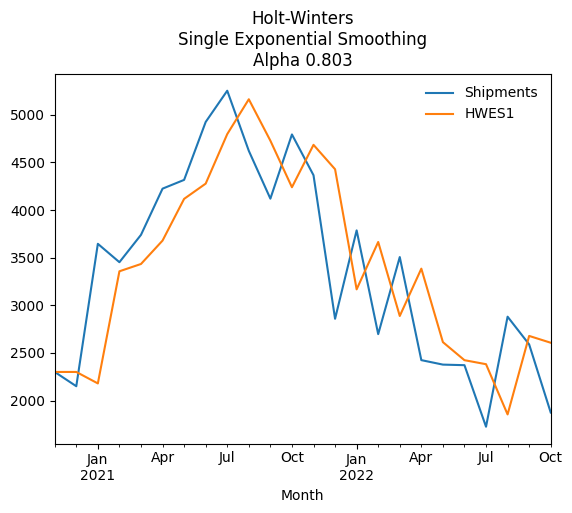

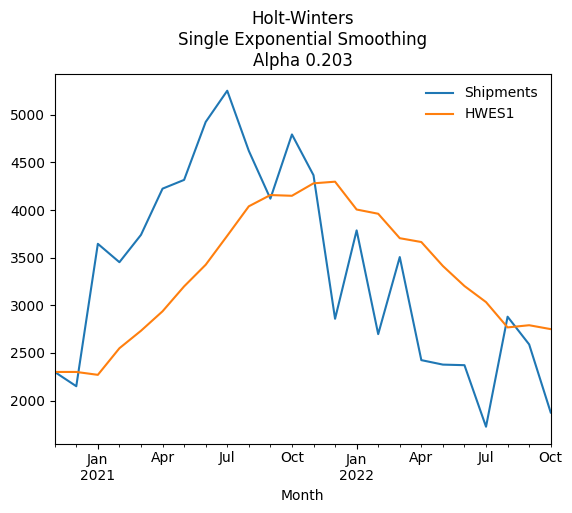

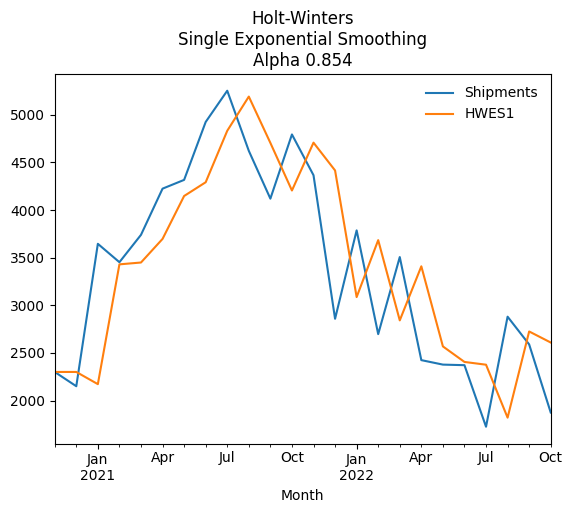

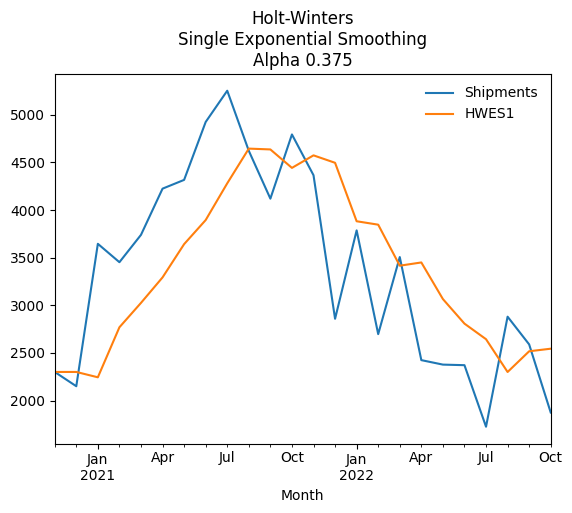

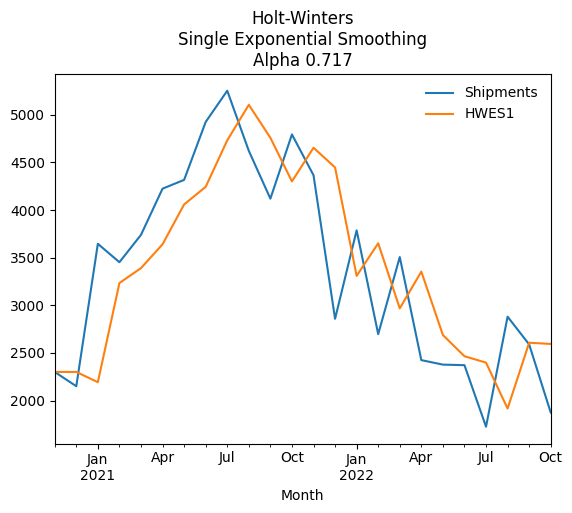

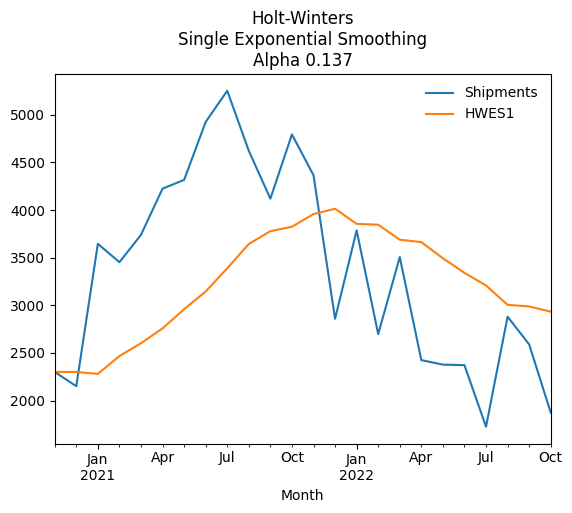

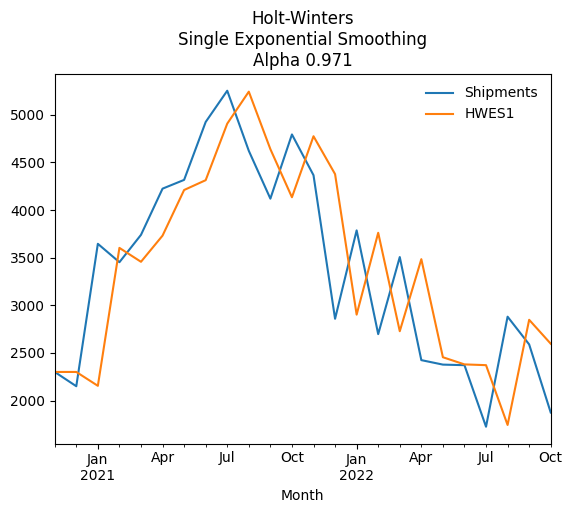

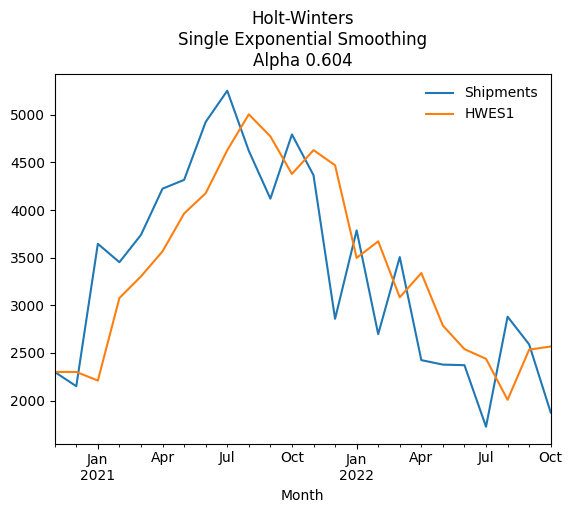

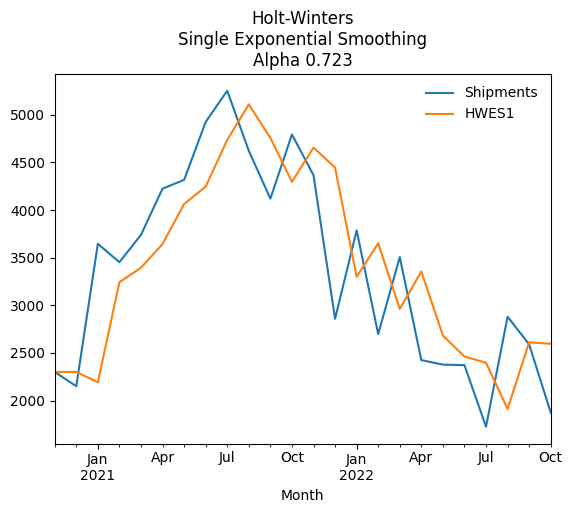

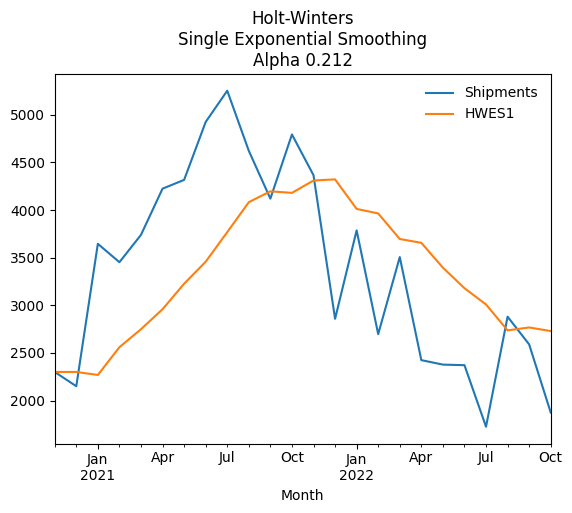

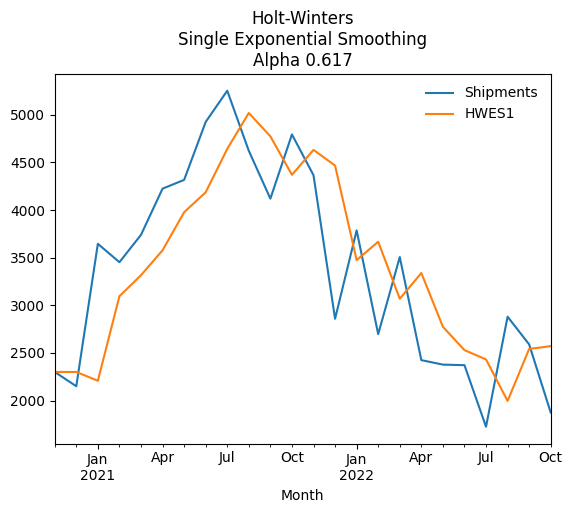

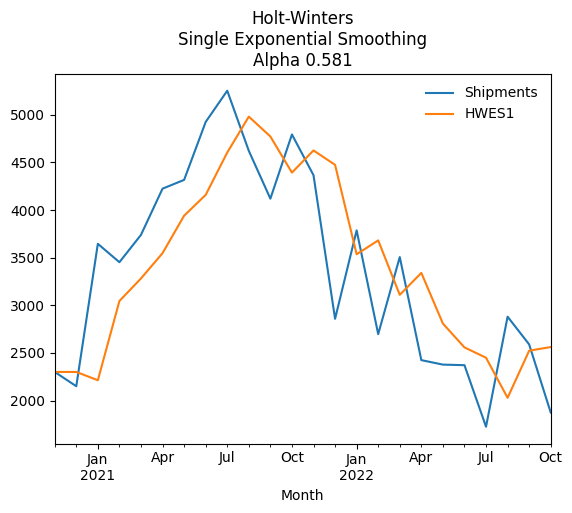

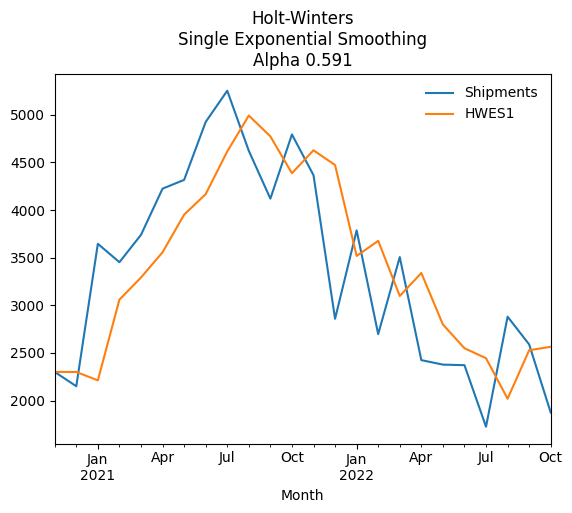

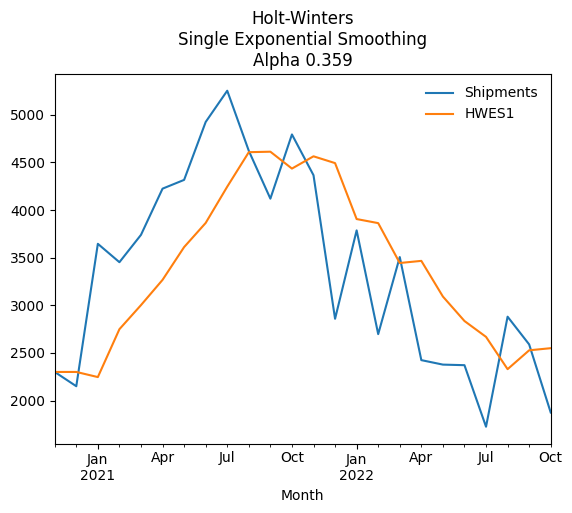

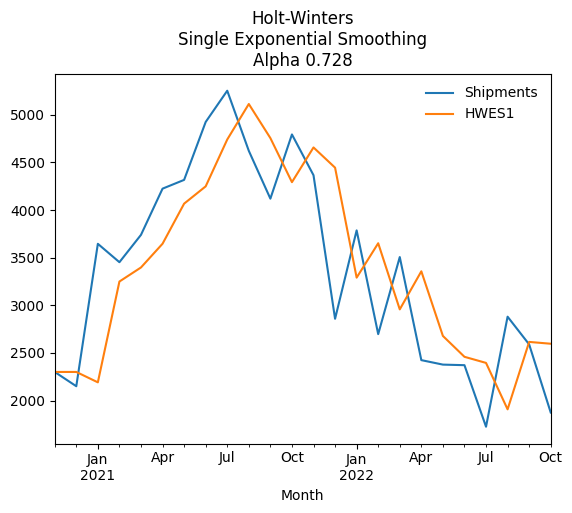

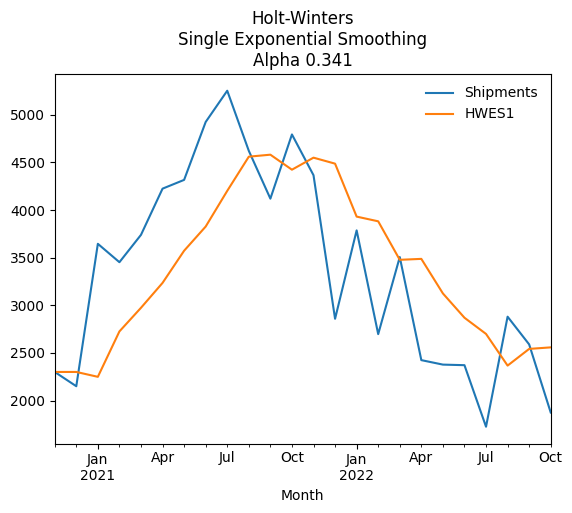

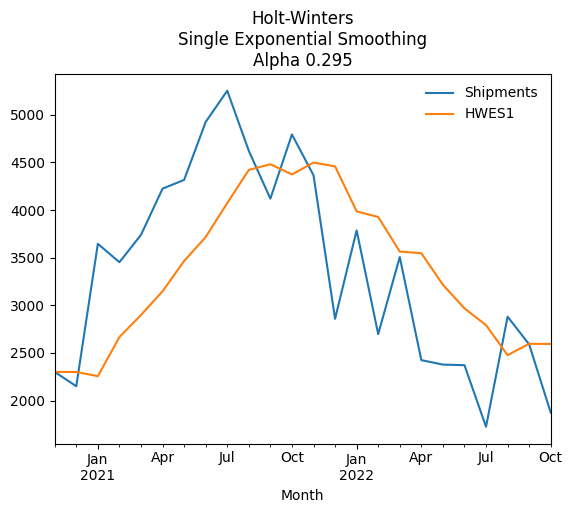

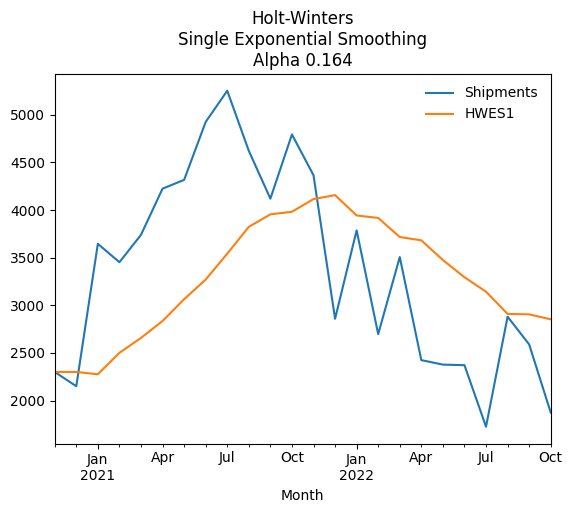

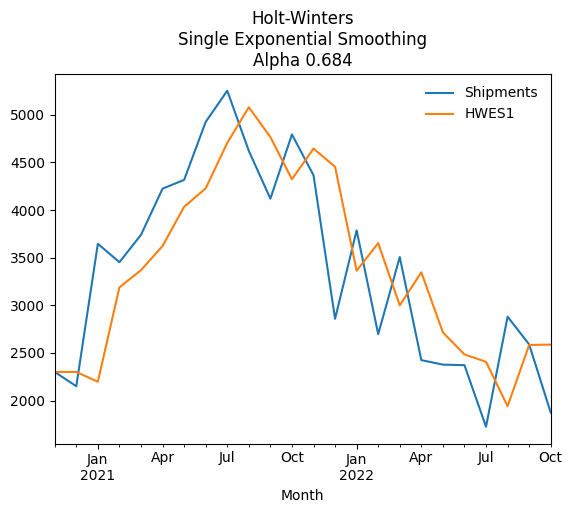

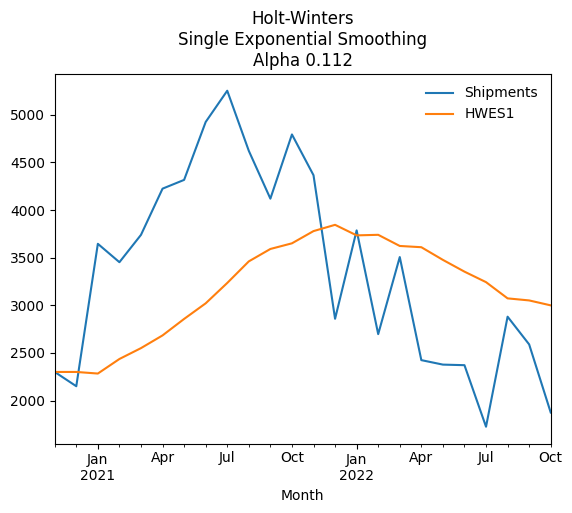

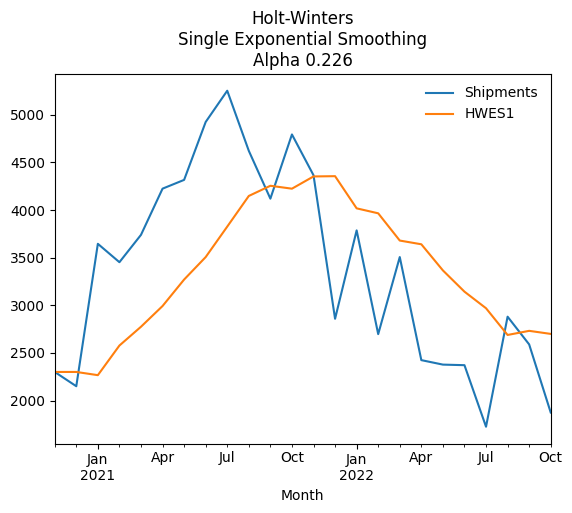

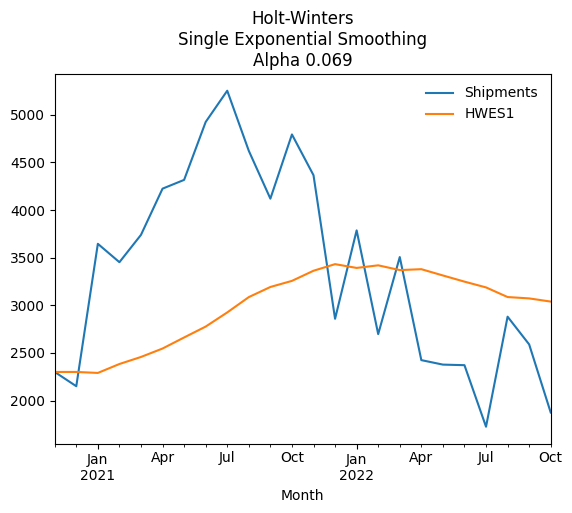

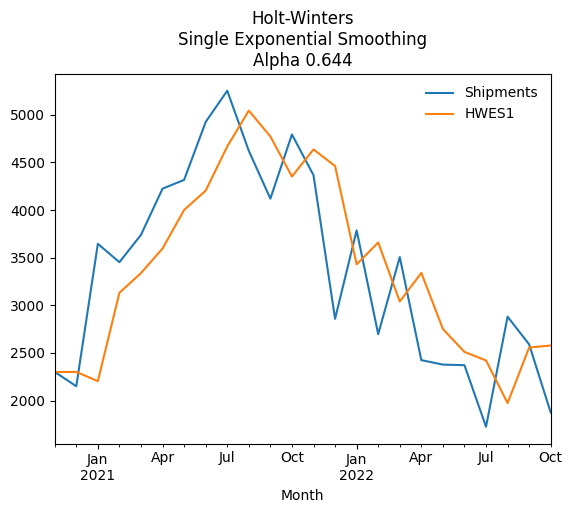

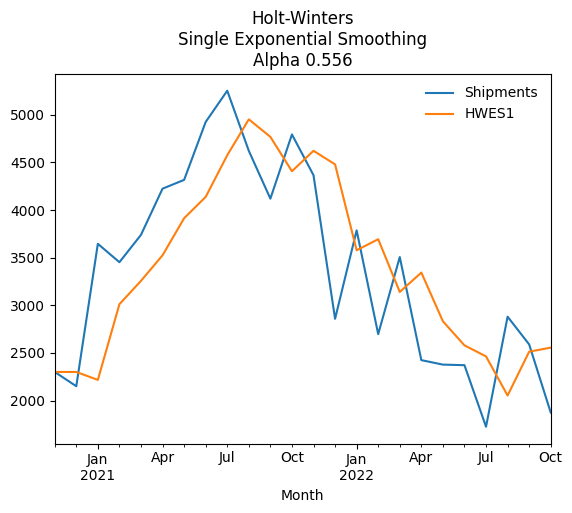

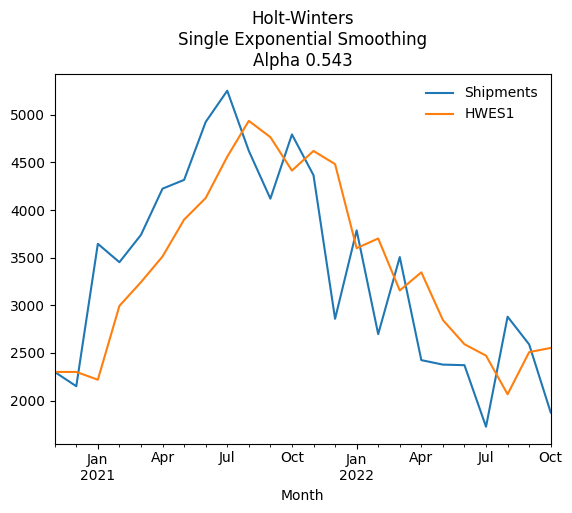

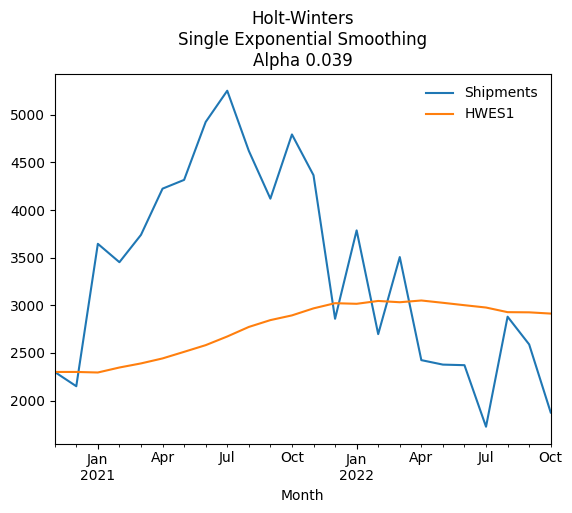

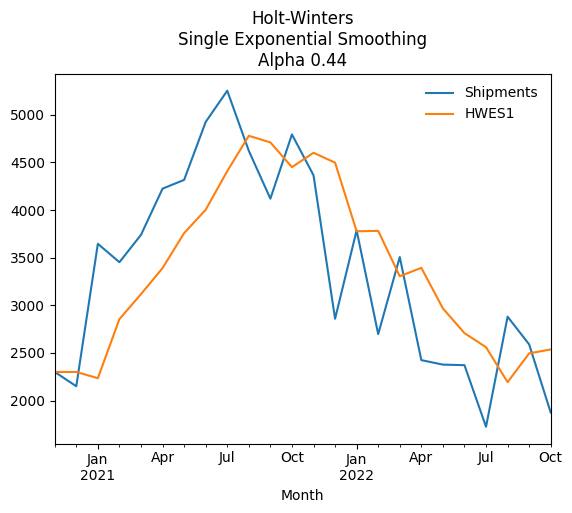

In [ ]:
alphas=[0.4,0.7,0.3]

import random    ## Numeros aleatorios
random.seed(13)  ## Semilla de inicializacón
alphas=[random.random()  for i in range(100)]

metrica_full= pd.DataFrame()

for alpha in alphas:
  name= 'Graficas_class'+ str(today)+'_alpha_' +str(alpha)+ '.png'

  airline["HWES1"] = SimpleExpSmoothing(airline["Shipments"]).\
  fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
  actual= airline['Shipments']
  forecast= airline['HWES1']

  metrica= errores(actual, forecast)
  metrica['alpha']=alpha

  metrica_full=metrica_full.append(metrica)

  print('alpha: '+ str(round(alpha,3)))

  airline[["Shipments","HWES1"]].\
  plot(title="Holt-Winters" +"\n"+  "Single Exponential Smoothing"+ "\n"+"Alpha " +str(round(alpha,3)) );
  plt.legend(framealpha=1, frameon=False);
  plt.savefig(path_imagenes+'/'+ name,dpi=300)


In [ ]:
mask = (metrica_full['metrica']=='mean_absolute_percentage_error') #&  (metrica_full['valor']==metrica_full['valor'].min())
a= metrica_full[mask] #definio el subconjunto de A para poder sacar el mape
mask= (a['valor']==a['valor'].min())
a[mask]

metrica     valor     alpha
3  mean_absolute_percentage_error  0.181112  0.734024

# Descarga del

In [ ]:
### r2 score es el coeficiente de correlacion
metrica_full.to_csv('salida.csv',index=False,encoding='utf-8')
metrica_full.to_csv(path_imagenes+'/' + 'salida_'+ str(today) + '.csv',index=False,encoding='utf-8')
files.download('salida.csv')

NameError: ignored

In [ ]:
airline["HWES2_ADD"] = ExponentialSmoothing(airline["Shipments"],trend="add").fit().fittedvalues
airline["HWES2_MUL"] = ExponentialSmoothing(airline["Shipments"],trend="mul").fit().fittedvalues

airline[["Shipments","HWES2_ADD","HWES2_MUL"]].\
plot(title="Holt-Winters" +"\n"+ "Double Exponential Smoothing:"+"\n"+ "Additive and Multiplicative Trend")
plt.legend(framealpha=1, frameon=False);

In [ ]:
#### Triple HWES
airline["HWES3_ADD"] = ExponentialSmoothing(airline["Shipments"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
airline["HWES3_MUL"] = ExponentialSmoothing(airline["Shipments"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
airline[["Shipments","HWES3_ADD","HWES3_MUL"]].\
plot(title="Holt-Winters " +"\n"+ "Triple Exponential Smoothing:" +"\n"+ " Additive and Multiplicative Seasonality");
plt.legend(framealpha=1, frameon=False);

In [ ]:
airline.query('HWES1>112.00')